# Spline interpolacion
  

In [85]:
import numpy as np
import matplotlib.pylab as plt
from numpy.linalg import solve
from collections.abc import Iterable
%matplotlib inline
#REF: Adaptado de  https://github.com/rrgalvan

Calcular el spline cúbico que interpola los puntos $(-1,5)$, $(0,3)$, $(1,3)$.

In [ ]:
x0, x1, x2 = -1, 0, 1
_x = np.array([x0, x1, x2])
y0, y1, y2 =  5, 3, 3
_y = np.array([y0, y1, y2])

Para calcular los splines cúbicos debemos resolver el sistema de ecuaciones que define los coeficientes de los polinomios cúbicos en los subintervalos $[-1,0]$ y $[0,1]$. Empleando las condiciones del metodo de spline, y defiendo los polinomios para garantizar la continuidad en cada unos de los puntos, tenemos que:

Sean:
  * $s_0(x) = a_0 + b_0 (x-x_0) + c_0 (x-x_0)^2 + d_0 (x-x_0)^3$,
  * $s_1(x) = a_1 + b_1 (x-x_1) + c_1 (x-x_1)^2 + d_1 (x-x_1)^3$,

es decir:
  * $s_0(x) = a_0 + b_0 (x+1) + c_0 (x+1)^2 + d_0 (x+1)^3$,
  * $s_1(x) = a_1 + b_1 x + c_1 x^2 + d_1 x^3$.

Entonces
  * $s_0'(x) =  b_0 + 2 c_0 (x+1) + 3 d_0 (x+1)^2$,
  * $s_0''(x) = 2 c_0 + 6 d_0 (x+1)$,
  * $s_1'(x) =  b_1 + 2 c_1 x + 3 d_1 x^2$,
  * $s_1''(x) = 2 c_1 + 6 d_1 x$.

Tenemos 8 incógnitas, $a_i$, $b_i$, $c_i$, $d_i$ con $i=0,1$. Las ecuaciones son:

  * Interpolación (y continuidad en 0):

    * $s_0(-1) = 5$, es decir, $a_0=5$.
    * $s_0(0)  = 3$, es decir, $a_0+b_0+c_0+d_0=3$.
    * $s_1(0) = 3$, es decir, $a_1=3$.
    * $s_1(1)  = 3$, es decir, $a_1+b_1+c_1+d_1=3$.
    
  * Derivabilidad:

    * $s_0'(0) = s_1'(-1)$, es decir, $b_0+2c_0+3d_0 = b_1$.
    * $s_0''(0) = s_1''(-1)$, es decir, $2c_0+6d_0 = 2c_1$.

  * Condiciones naturales en los extremos, $-1$ y $1$:

    * $s_0''(-1) = 0$, es decir, $2c_0=0$.
    * $s_1''(1) = 0$, o sea $2c_1+6d_1=0$.


De estas ecuaciones tenemos directamente $a_0$, $a_1$, y $c_0$. Le damos valores a las variables en python:

In [ ]:
a0 = 5
a1 = 3
c0 = 0

Así, podemos eliminar la primera, tercera y séptima ecuación, llegando a un sistema de cinco ecuaciones con cinco incógnitas ($b_0$, $d_0$, $b_1$, $c_1$, $d_1$):

 * $b_0+d_0=3-a_0-c_0=-2$,
 * $b_1+c_1+d_1=3-a_1=0$,
 * $b_0+3d_0 - b_1 = -2c_0 = 0$,
 * $6d_0 - 2c_1 = -2c_0=0$
 * $2c_1+6d_1=0$


La matriz y el segundo miembro asociados son:

In [ ]:
A = np.array([
	[ 1, 1,   0,  0, 0],
	[ 0, 0,   1,  1, 1],
	[ 1, 3,  -1,  0, 0],
	[ 0, 6,   0, -2, 0],
	[ 0, 0,   0,  2, 6]])
b = np.array([-2, 0, 0, 0, 0])

In [ ]:
sol = solve(A,b)
print(sol)

[-2.5  0.5 -1.   1.5 -0.5]


Ahora podemos resolver este sistema usando la función `solve()` (incluida en el modulo "linalg" del paquete *numpy*):

In [ ]:
sol = solve(A,b)

# Definimos la solución como variables b0, d0, b1, c1 y d1
b0, d0, b1, c1, d1 = sol

# Y mostramos los resultados
print ("a0, b0, c0, d0 = %f, %f, %f, %f" % (a0, b0, c0, d0))
print ("a1, b1, c1, d1 = %f, %f, %f, %f" % (a1, b1, c1, d1))

a0, b0, c0, d0 = 5.000000, -2.500000, 0.000000, 0.500000
a1, b1, c1, d1 = 3.000000, -1.000000, 1.500000, -0.500000


Para dibujar la gráfica, lo más fácil es definir los polinomios $s_0$ y $s_1$ y representarlos gráficamente.

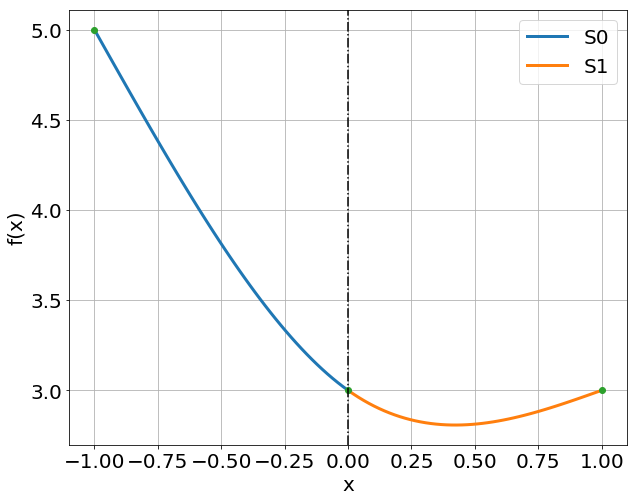

In [ ]:
def s0(x):
    return a0 + b0*(x+1) + c0*(x+1)**2 + d0*(x+1)**3
def s1(x):
    return a1 + b1*x + c1*x**2 + d1*x**3

xx0 = np.linspace(-1,0)
xx1 = np.linspace(0,1)

plt.figure(figsize=(10, 8))
plt.plot(xx0, s0(xx0), lw=3, label = "S0")
plt.plot(xx1, s1(xx1), lw=3, label = "S1")
plt.plot(_x, _y, 'o')
plt.axvline(color = "k", ls="-.")
plt.ylabel("f(x)", fontsize=20)
plt.xlabel("x", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc = "upper right", fontsize= 20)
plt.grid()
plt.show()

ahora añadimos el punto $(2, 7) = (x_2,y_2)$ y encontramos su interpolación:

* $s_2(x) = a_2 + b_2 (x-2) + c_2 (x-2)^2 + d_2 (x-2)^3$,
* $s_2'(x) = b_2  + 2c_2 (x-2) + 3d_2 (x-2)^2$,
* $s_2''(x) = 2c_2 + 6d_2 (x-2)$,


* $s_2(1) = a_2 - b_2 + c_2 - d_2 = 3$,
* $s_2(2) = a_2 = 7$,


* $s_n(x) = a_n + b_n (x-x_n) + c_2 (x-x_n)^2 + d_2 (x-x_n)^3$,
* $s_n'(x) = b_n  + 2c_n (x-x_n) + 3d_n (x-x_n)^2$,
* $s_n''(x) = 2c_n + 6d_n (x-x_n)$,

In [98]:
#función que calcula los coeficientes de los polinomios del método de splines cúbicos

def coeficients(x_, y_):

    n = len(x_) - 1

    s_ = lambda i, x : np.block([np.zeros(4*(i)), np.array([1, (x-x_[i]), (x-x_[i])**2, (x-x_[i])**3]), np.zeros(4*(n-i-1))])
    sp_ = lambda i, x : np.block([np.zeros(4*(i)), np.array([0, 1, 2*(x-x_[i]), 3*(x-x_[i])**2]), np.zeros(4*(n-i-1))])
    spp_ = lambda i, x : np.block([np.zeros(4*(i)), np.array([0, 0, 2, 6*(x-x_[i])]), np.zeros(4*(n-i-1))])

    s_0 = s_(0, x_[0])
    ecu = s_0
    abcd = [y_[0]]

    for i in range(1,n):
        ecu = np.block([
            [ecu],
            [s_(i-1, x_[i])],
            [s_(i, x_[i])]
            ])
        abcd += [y_[i], y_[i]]

    ecu = np.block([
        [ecu],
        [s_(n-1, x_[n])]
        ])
    abcd += [y_[n]]

    for i in range(1,n):
        ecu = np.block([
            [ecu],
            [sp_(i-1, x_[i])-sp_(i, x_[i])],
            [spp_(i-1, x_[i])-spp_(i, x_[i])]
        ])
        abcd += [0, 0]


    ecu = np.block([
        [ecu],
        [spp_(0, x_[0])],
        [spp_(n-1, x_[n])]
    ])
    abcd += [0, 0]

    abcd = np.array(abcd)
    return solve(ecu, abcd)

#fun partes evalua una funcion por partes en un valor x dado a la funcion
#recibe como argumentos una lista de funciones (definicion de la funcion para cada intervalo), una lista de valores (valores a partir de los que cambia el intervalo) y x
def func_partes(funcion, intervalos, x):
    i = 1
    if isinstance(x, Iterable):
        return np.array([func_partes(funcion, intervalos, xi) for xi in x])
    while intervalos[i] < x :
        i += 1
    return funcion[i-1](x)

# la función poly nos encuetra los polinomios de los splines cúbicos y y los devuelve en una lista
def poly(x_, y_):
    coef = coeficients(x_, y_)
    coefi = [[coef[0 + 4*i] , coef[1 + 4*i], coef[2 + 4*i] , coef[3 + 4*i]][::-1] for i in range(len(x_)-1)]

# esto crea una lista con funciones que representan los splines de cada intervalo de la interpolacion
    fan = lambda i: lambda x: np.poly1d(coefi[i])(x-x_[i])
    return [fan(i) for i in range(len(x_)-1)]

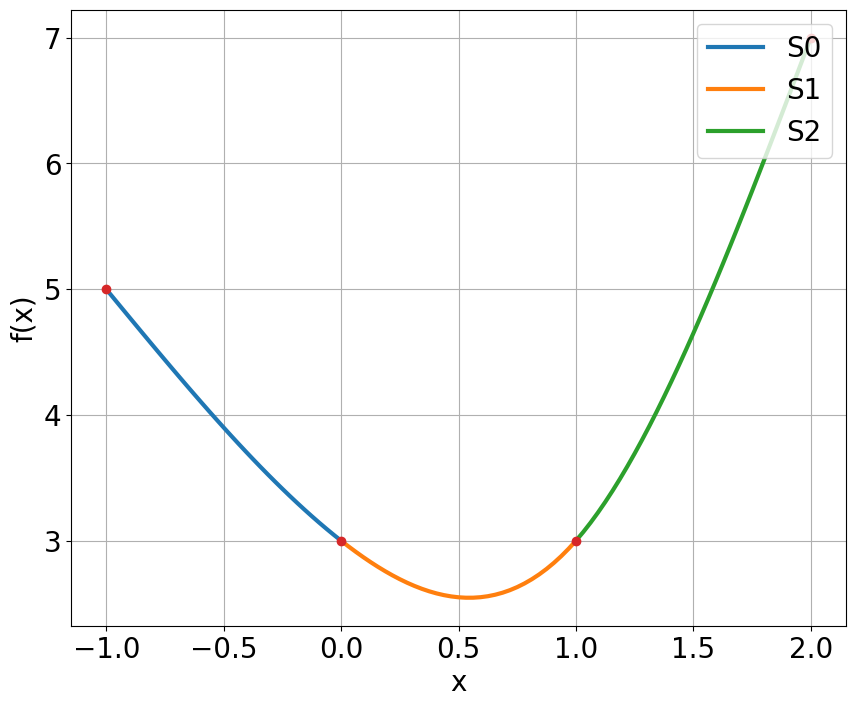

In [198]:
#ahora a añadimos el punto 2,7 a la interpolación

x_ = [-1, 0, 1, 2]
y_ = [ 5, 3, 3, 7]

coeficients(x_, y_)

splines = poly(x_, y_)

interpolation = lambda x : func_partes(splines, x_, x)

plt.figure(figsize=(10, 8))
for i in range(len(x_)-1):
    x_graph = np.linspace(x_[i], x_[i+1],int(100*(abs(x_[i]-x_[i+1])/abs(x_[-1]-x_[0]))))
    plt.plot(x_graph, interpolation(x_graph), lw=3, label = f"S{i}")
plt.plot(x_, y_, 'o')
plt.ylabel("f(x)", fontsize=20)
plt.xlabel("x", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc = "upper right", fontsize= 20)
plt.grid()
plt.show()

basuar